In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


In [2]:
cine_DENSE_fname = '/scratch/jx8fh/2024-04-21-matched-cine-DENSE-from-Yu-all-with-resampled.npy'
cine_DENSE_data = np.load(cine_DENSE_fname, allow_pickle=True).tolist()

In [3]:
len(cine_DENSE_data)

105

In [4]:
check_dict(cine_DENSE_data[0])

AnalysisInfo                                                 dict_keys(['ResampleMethod', 'ResampleDistance', 'SpatialSmoothing', 'TemporalOrder', 'Xseed', 'Yseed', 'Zseed', 'FramesForAnalysis', 'Nmodel', 'PositionA', 'PositionB', 'Clockwise'])
AnalysisInstanceUID                                          1.3.6.1.4.1.9590.100.1.2.64946301013757307506911904523491151334
DENSEInfo                                                    dict_keys(['Name', 'UID', 'Type', 'MagIndex', 'PhaIndex', 'Number', 'PixelSpacing', 'Scale', 'EncFreq', 'SwapFlag', 'NegFlag'])
DENSE_Eul_displacement_field_Multipliers                     (3,)                
DENSE_Eul_displacement_field_X                               (48, 48, 51)        
DENSE_Eul_displacement_field_Y                               (48, 48, 51)        
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_frame_indices_with_myo_co

In [5]:
data_recompute_strain_fname = '/scratch/jx8fh/2024-04-21-matched-cine-DENSE-from-Yu-all-recompute-strain.npy'
data_recompute_strain = np.load(data_recompute_strain_fname, allow_pickle=True).tolist()
check_dict(data_recompute_strain[0])

CCImg                                                        (48, 48, 51)        
CCImg_GT                                                     (128, 128, 51)      
DENSE_strain                                                 dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'CCs4Resampled', 'CCs6Resampled', 'CCs18Resampled'])
Diffusion_cine_strain                                        dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'CCs4Resampled', 'CCs6Resampled', 'CCs18Resampled'])
UNetR_cine_strain                                            dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'CCs4Resampled', 'CCs6Resampled', 'CCs18Resampled'])
StrainNet_cine_strain                                        dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'CCs4Resampled', 'CCs6Resampled', 'CCs18Resampled'])


In [6]:
len(data_recompute_strain)

105

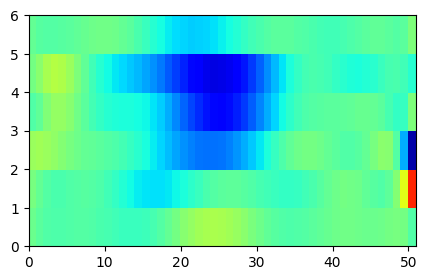

In [7]:
datum_idx = 0
fig, axe = plt.subplots(1, 1, figsize=(5, 3))
axe.pcolor(data_recompute_strain[datum_idx]['DENSE_strain']['CCs6'], cmap='jet', vmin=-0.2, vmax=0.2)

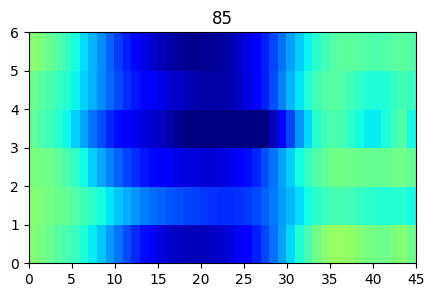

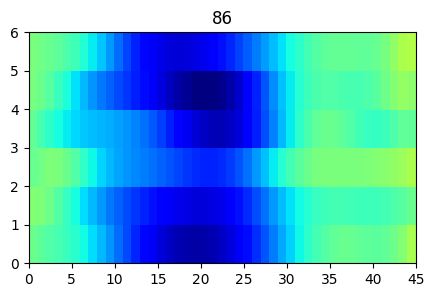

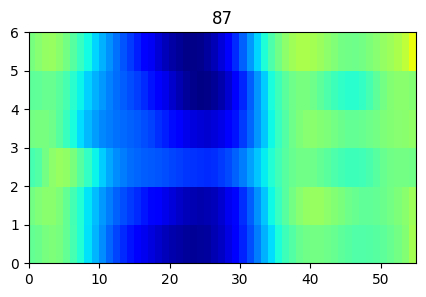

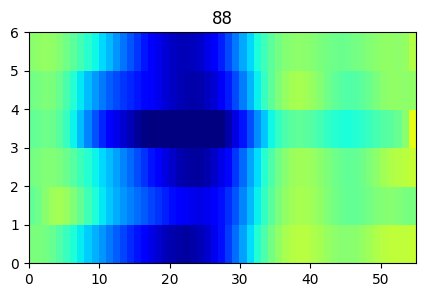

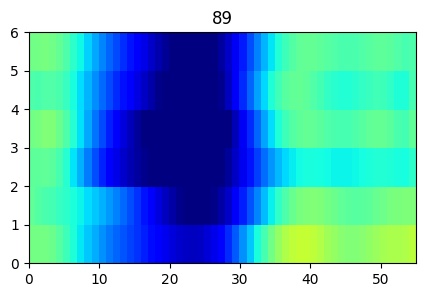

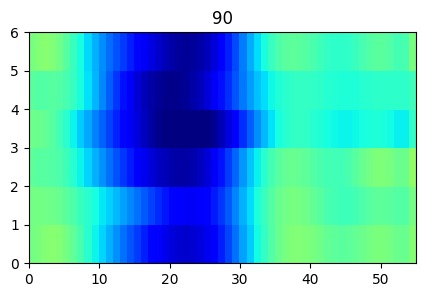

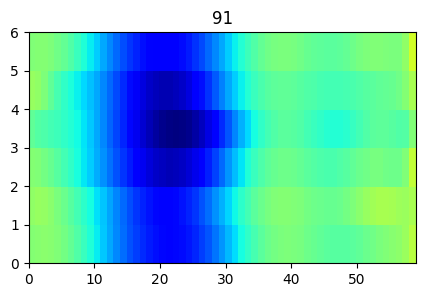

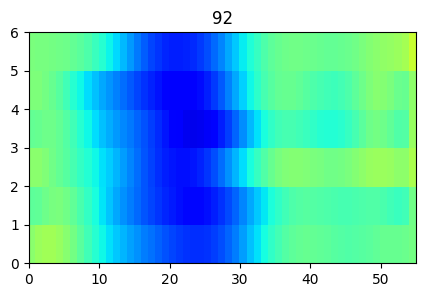

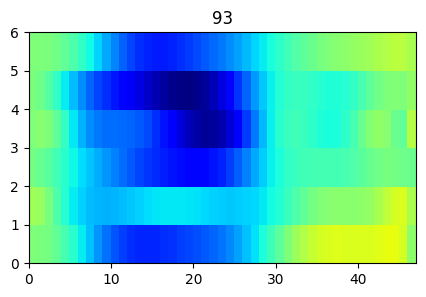

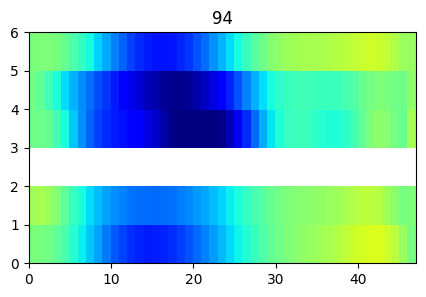

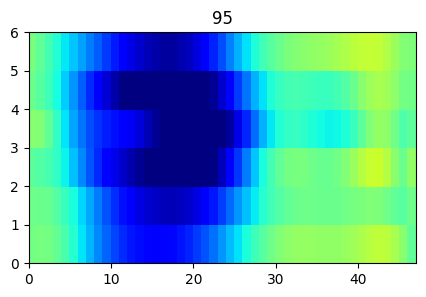

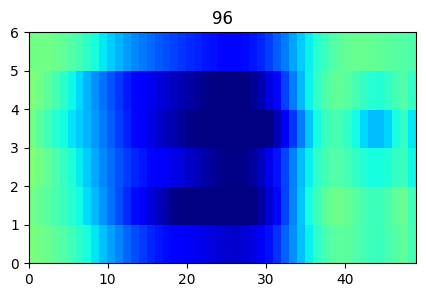

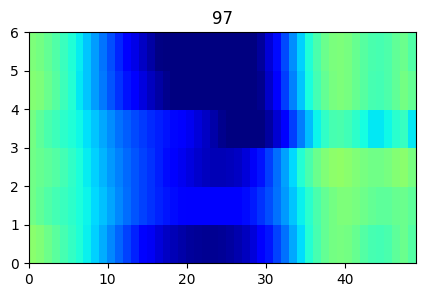

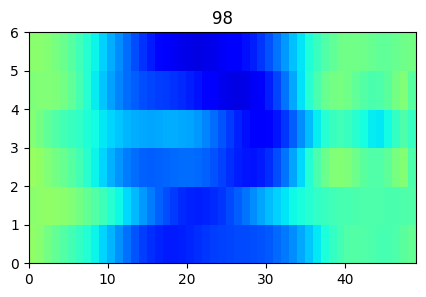

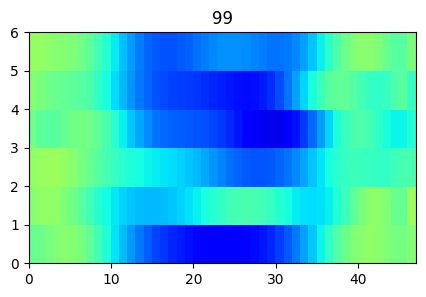

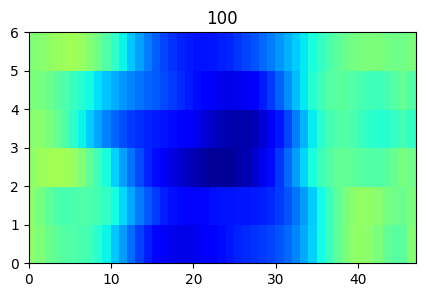

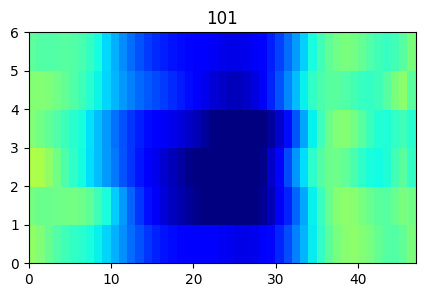

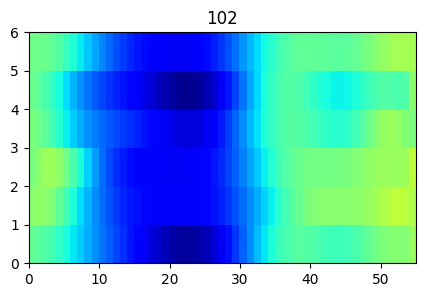

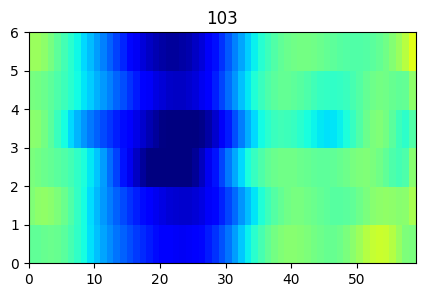

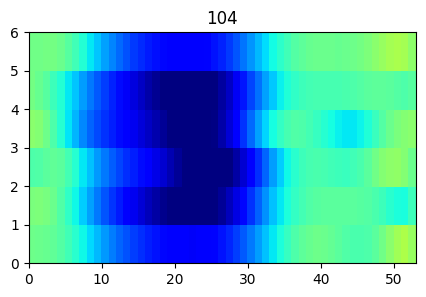

In [14]:
# datum_idx = 0
start_datum_idx = 85
for datum_idx in range(start_datum_idx, min(start_datum_idx+20, len(data_recompute_strain))):
    fig, axe = plt.subplots(1, 1, figsize=(5, 3))
    # axe.pcolor(data_recompute_strain[datum_idx]['DENSE_strain']['CCs6'][::-1], cmap='jet', vmin=-0.2, vmax=0.2)
    axe.pcolor(data_recompute_strain[datum_idx]['DENSE_strain']['CCs6'], cmap='jet', vmin=-0.2, vmax=0.2)
    axe.set_title(f'{datum_idx}')